# Ejercicio 3


Importamos las librerías necesarias:

In [34]:
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib notebook
from func import *
import numpy as np

Creamos el grafo y asignaciones que vamos a usar:

In [35]:
sa = nx.read_gml("TC01_data/as-22july06.gml")
N = sa.number_of_nodes()
listk = degrees2list(sa) #lista con el grado de cada nodo, i.e len(listk)==N
kmax = max(listk)

Calculamos la distribución de grado, esto es $p_k = \frac{N_k}{N}$. Para eso, creamos un diccionario tal que las "keys" sean el grado y los "values" asociados sean la cantidad de nodos con ese grado. De allí sacamos la información necesaria para graficar la distribución de grado utilizando diferentes alternativas de visualización.

In [41]:
K = dict()

for i in set(listk):
    K[i] = 0

for k in listk:
    K[k] += 1

k = list(K.keys())  
pk = np.array(list(K.values()))/N

## Linear Binning
Empezamos graficando $p_k$ en función de $k$ con una escala lineal en ambos ejes. Esta elección parece no resultar útil debido a que...

<IPython.core.display.Javascript object>


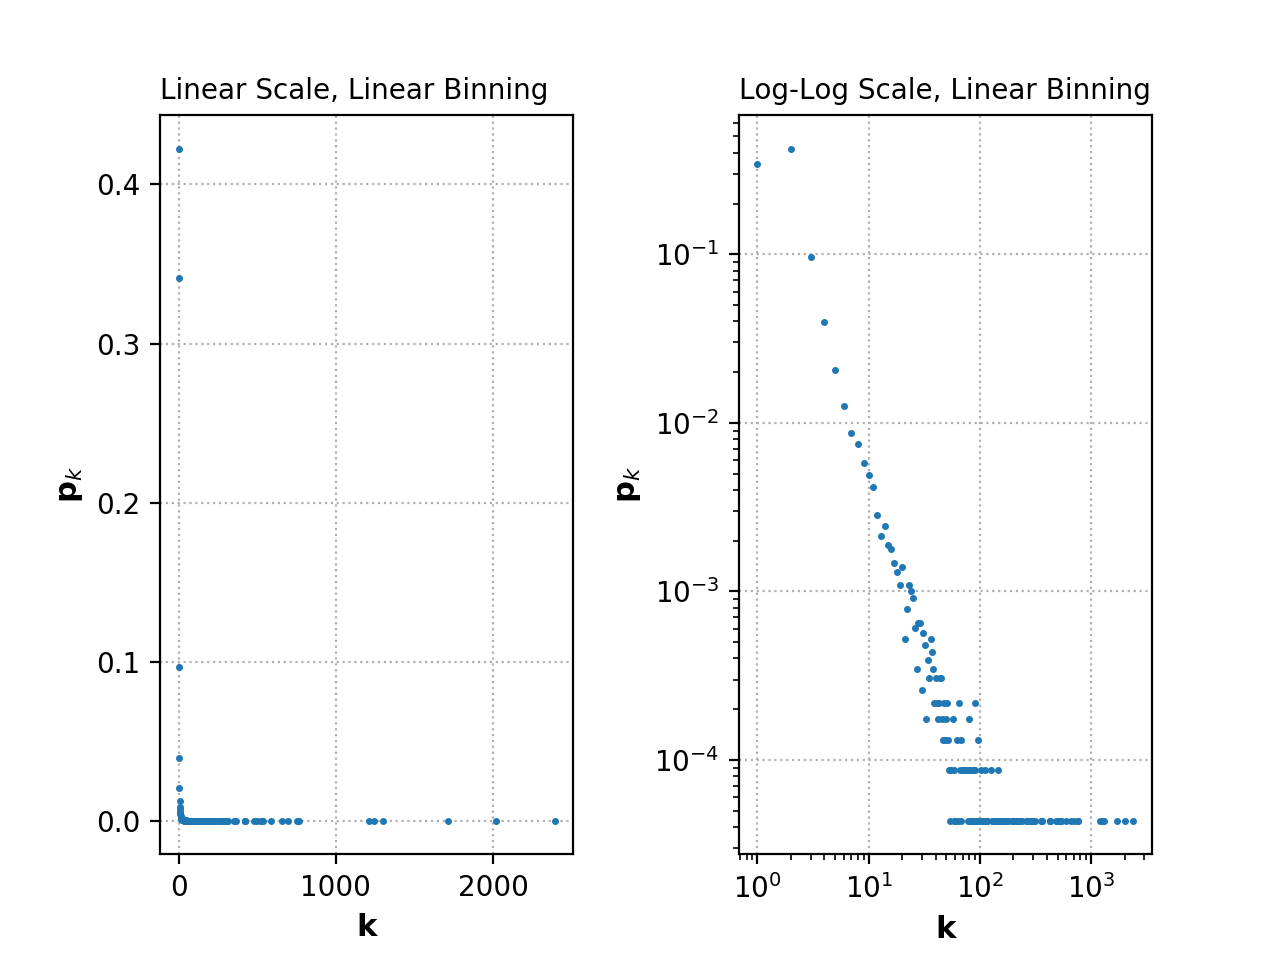

In [42]:
f, (ax1,ax2) = plt.subplots(1,2)

def applyPlotStyle():
    plt.xlabel('k',weight='bold',fontsize=11)
    plt.ylabel(r'p$_k$',weight='bold',fontsize=11)
    plt.grid(linestyle=':')

plt.sca(ax1)
plt.title('Linear Scale, Linear Binning',loc='left',fontsize=10)
plt.plot(k,pk,'.',markersize=3) 
applyPlotStyle()

plt.sca(ax2)
plt.title('Log-Log Scale, Linear Binning',loc='left',fontsize=10)
plt.loglog(k,pk,'.',markersize=3)
applyPlotStyle()

plt.subplots_adjust(wspace=0.4)

## Logarithmic Binning

In [39]:
n = 14
bins = np.logspace(0, np.log10(kmax+1), n)
h, bins = np.histogram(listk, bins)

centros = []
for i in range(len(bins)-1):
    c = (bins[i]+bins[i+1])/2
    centros.append(c)

A = []
for i in range(len(h)):
    A.append(h[i]/(bins[i+1]-bins[i]))
pk_log=A/sum(A)

<IPython.core.display.Javascript object>


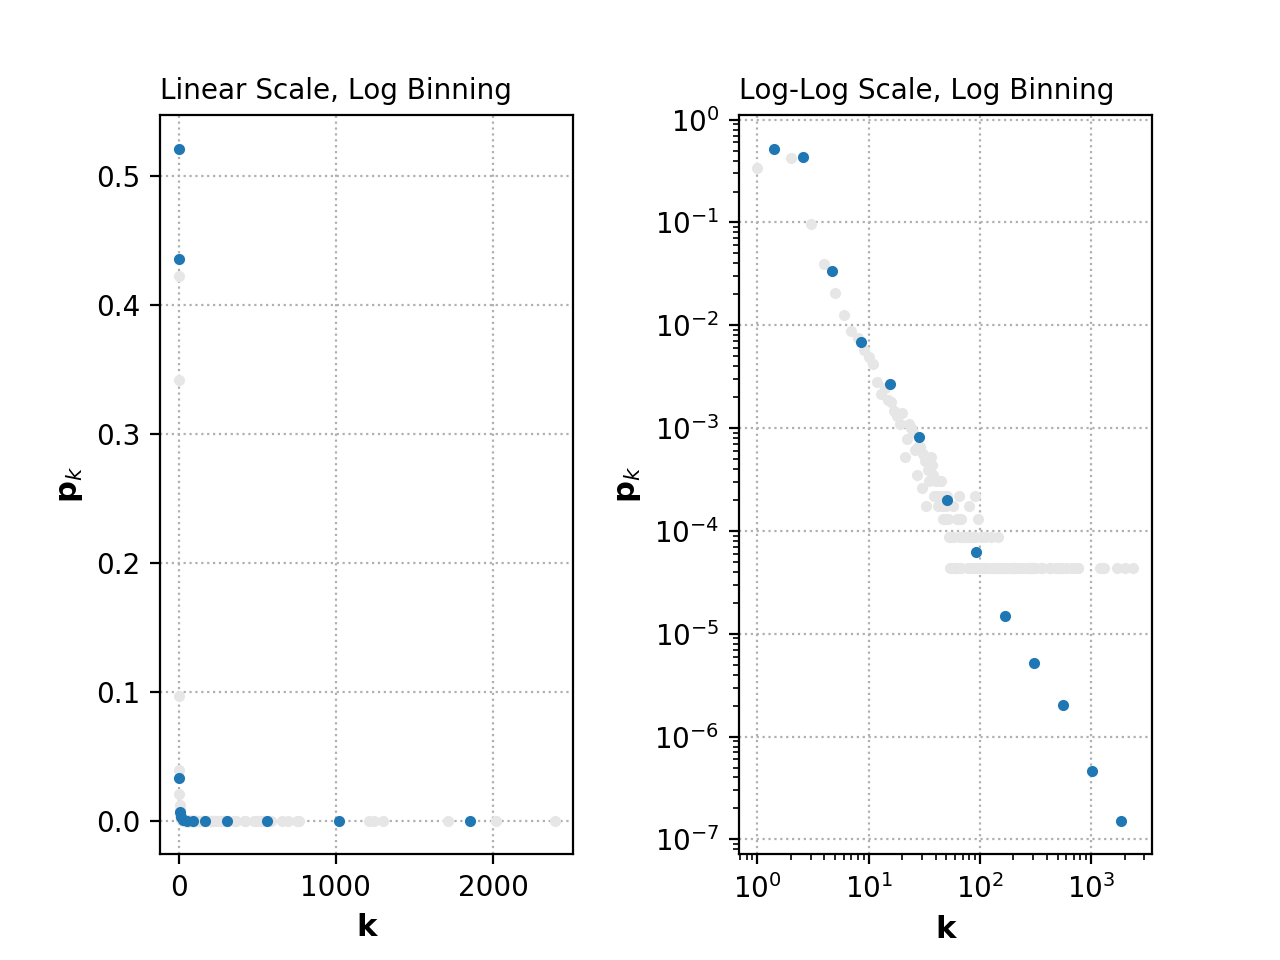

In [40]:
f, (ax1,ax2) = plt.subplots(1,2)

plt.sca(ax1)
plt.title('Linear Scale, Log Binning',loc='left',fontsize=10)
plt.plot(k,pk,'.',color='0.9')
plt.plot(centros,pk_log,'.')
applyPlotStyle()

plt.sca(ax2)
plt.title('Log-Log Scale, Log Binning',loc='left',fontsize=10)
plt.loglog(k,pk,'.',color='0.9')
plt.loglog(centros,pk_log,'.')
applyPlotStyle()

plt.subplots_adjust(wspace=0.4)